
Given the notebook, https://github.com/jpata/particleflow/blob/nb_clic_evaluate/notebooks/mlpf-clic-evaluate.ipynb as it loads the model, sets the weights, run the inference on a  set of events and compare the true vs. Predicted value for pT on a smaller subset.

*Task:*
Do the quantization of the model, and the conversion of the data, all in one notebook along with the model inference. 



Load the quantized model, load the quantized weights, and convert all of the data using quantization and then mesaure the inference

some point you need to use something like tf.lite.TFLiteConverter?
https://www.tensorflow.org/lite/performance/post_training_integer_quant
or is there another way?

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

2023-11-14 13:23:37.886265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
!wget https://huggingface.co/jpata/particleflow/blob/clic_clusters_v1.6/weights-96-5.346523.hdf5


--2023-11-14 13:33:26--  https://huggingface.co/jpata/particleflow/blob/clic_clusters_v1.6/weights-96-5.346523.hdf5
Resolving huggingface.co (huggingface.co)... 2600:9000:24bf:7c00:17:b174:6d00:93a1, 2600:9000:24bf:7200:17:b174:6d00:93a1, 2600:9000:24bf:8a00:17:b174:6d00:93a1, ...
Connecting to huggingface.co (huggingface.co)|2600:9000:24bf:7c00:17:b174:6d00:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40417 (39K) [text/html]
Saving to: ‘weights-96-5.346523.hdf5’

100%[======================================>] 40,417      --.-K/s   in 0.001s  

2023-11-14 13:33:30 (36.3 MB/s) - ‘weights-96-5.346523.hdf5’ saved [40417/40417]



In [2]:
import sys
sys.path += ["../../../particleflow/mlpf/"]
from tfmodel.model_setup import make_model
from tfmodel.utils import parse_config

In [3]:
config, _ = parse_config("../../../particleflow/parameters/clic.yaml")

In [4]:
model = make_model(config, tf.float32)
model.build((1, None, config["dataset"]["num_input_features"]))


2023-11-14 13:27:57.934874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 13:27:57.940916: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "pf_net_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 node_encoding (Sequential)  (1, None, 256)            71462     
                                                                 
 input_encoding_clic (InputE  multiple                 0         
 ncodingCLIC)                                                    
                                                                 
 cg_id_0 (CombinedGraphLayer  multiple                 441024    
 )                                                               
                                                                 
 cg_id_1 (CombinedGraphLayer  multiple                 441024    
 )                                                               
                                                                 
 cg_id_2 (CombinedGraphLayer  multiple                 441024    
 )                                                    

In [6]:
model.load_weights("../weights-96-5.346523.hdf5", skip_mismatch=False, by_name=True)


ValueError: Weight count mismatch for layer #1 (named node_encoding). Layer expects 8 weight(s). Received 4 saved weight(s)

In [14]:
## Reading the dataset
ds_builder = tfds.builder("clic_edm_qq_pf", data_dir = '../../../tensorflow_datasets/')
dss = ds_builder.as_data_source("test")



DatasetNotFoundError: Dataset clic_edm_qq_pf not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asqa
	- asset
	- assin2
	- bair_robot_pushing_small
	- bccd
	- beans
	- bee_dataset
	- beir
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- ble_wind_field
	- blimp
	- booksum
	- bool_q
	- bucc
	- c4
	- c4_wsrs
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cardiotox
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar100_n
	- cifar10_1
	- cifar10_corrupted
	- cifar10_n
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- common_voice
	- conll2002
	- conll2003
	- controlled_noisy_web_labels
	- coqa
	- cos_e
	- cosmos_qa
	- covid19
	- covid19sum
	- crema_d
	- criteo
	- cs_restaurants
	- curated_breast_imaging_ddsm
	- cycle_gan
	- d4rl_adroit_door
	- d4rl_adroit_hammer
	- d4rl_adroit_pen
	- d4rl_adroit_relocate
	- d4rl_antmaze
	- d4rl_mujoco_ant
	- d4rl_mujoco_halfcheetah
	- d4rl_mujoco_hopper
	- d4rl_mujoco_walker2d
	- dart
	- davis
	- deep1b
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- diamonds
	- div2k
	- dmlab
	- doc_nli
	- dolphin_number_word
	- domainnet
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- efron_morris75
	- emnist
	- eraser_multi_rc
	- esnli
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- food101
	- forest_fires
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- gem
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glove100_angular
	- glue
	- goemotions
	- gov_report
	- gpt3
	- gref
	- groove
	- grounded_scan
	- gsm8k
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- hillstrom
	- horses_or_humans
	- howell
	- i_naturalist2017
	- i_naturalist2018
	- i_naturalist2021
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_fewshot
	- imagenet2012_multilabel
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_lt
	- imagenet_r
	- imagenet_resized
	- imagenet_sketch
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- irc_disentanglement
	- iris
	- istella
	- kddcup99
	- kitti
	- kmnist
	- laion400m
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- locomotion
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- math_dataset
	- math_qa
	- mctaco
	- media_sum
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- mrqa
	- mslr_web
	- mt_opt
	- mtnt
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_instructions
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- ogbg_molpcba
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- pass
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- penguins
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- placesfull
	- plant_leaves
	- plant_village
	- plantae_k
	- protein_net
	- q_re_cc
	- qa4mre
	- qasc
	- quac
	- quality
	- quickdraw_bitmap
	- race
	- radon
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- ref_coco
	- resisc45
	- rlu_atari
	- rlu_atari_checkpoints
	- rlu_atari_checkpoints_ordered
	- rlu_control_suite
	- rlu_dmlab_explore_object_rewards_few
	- rlu_dmlab_explore_object_rewards_many
	- rlu_dmlab_rooms_select_nonmatching_object
	- rlu_dmlab_rooms_watermaze
	- rlu_dmlab_seekavoid_arena01
	- rlu_locomotion
	- rlu_rwrl
	- robomimic_ph
	- robonet
	- robosuite_panda_pick_place_can
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- schema_guided_dialogue
	- sci_tail
	- scicite
	- scientific_papers
	- scrolls
	- sentiment140
	- shapes3d
	- sift1m
	- simpte
	- siscore
	- smallnorb
	- smartwatch_gestures
	- snli
	- so2sat
	- speech_commands
	- spoken_digit
	- squad
	- squad_question_generation
	- stanford_dogs
	- stanford_online_products
	- star_cfq
	- starcraft_video
	- stl10
	- story_cloze
	- summscreen
	- sun397
	- super_glue
	- svhn_cropped
	- symmetric_solids
	- tao
	- tatoeba
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tiny_shakespeare
	- titanic
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- unified_qa
	- universal_dependencies
	- unnatural_instructions
	- user_libri_audio
	- user_libri_text
	- vctk
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- waymo_open_dataset
	- web_graph
	- web_nlg
	- web_questions
	- wider_face
	- wiki40b
	- wiki_auto
	- wiki_bio
	- wiki_dialog
	- wiki_table_questions
	- wiki_table_text
	- wikiann
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wit
	- wit_kaggle
	- wmt13_translate
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_pos
	- xtreme_s
	- xtreme_xnli
	- yahoo_ltrc
	- yelp_polarity_reviews
	- yes_no
	- youtube_vis

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported

The builder directory ../../../tensorflow_datasets/clic_edm_qq_pf doesn't contain any versions.
No builder could be found in the directory: ../../../tensorflow_datasets/ for the builder: clic_edm_qq_pf.
No registered data_dirs were found in:
	- ../../../tensorflow_datasets/


In [ ]:
Check the error:
    1. Read data directly from the lxplus.


In [8]:
def yield_from_ds():
    for elem in dss:
        yield {"X": elem["X"], "ygen": elem["ygen"], "ycand": elem["ycand"]}

In [9]:
output_signature = {k: tf.TensorSpec(shape=(None, v.shape[1])) for (k, v) in dss.dataset_info.features.items()}
tf_dataset = tf.data.Dataset.from_generator(yield_from_ds, output_signature=output_signature).take(100).padded_batch(batch_size=10)


In [10]:
data = list(tfds.as_numpy(tf_dataset))


In [11]:
Xs = [d["X"] for d in data]
ys = [d["ygen"] for d in data]

In [12]:
true_pts = []
pred_pts = []

for ibatch in range(len(Xs)):
    ret = model(Xs[ibatch])

    mask_true_particles = ys[ibatch][..., 0]!=0
    
    true_pt = ys[ibatch][mask_true_particles, 2]
    pred_pt = ret["pt"][mask_true_particles][..., 0].numpy()

    true_pts.append(true_pt)
    pred_pts.append(pred_pt)

In [13]:
true_pt = np.concatenate(true_pts)
pred_pt = np.concatenate(pred_pts)

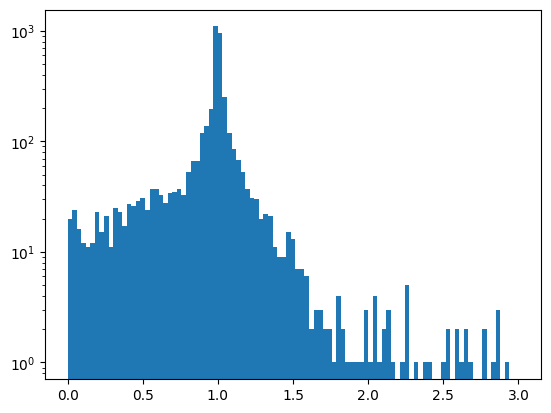

In [14]:
plt.hist(pred_pt/true_pt, bins=np.linspace(0,3,100));
plt.yscale("log")

## Quantized data into the unquantized model

Before feeding the input data to the model, we need to quantize it. 

In [23]:
# Quantize input data
Xs_quantized = [np.round(X * 127).astype(np.int8) for X in Xs]


In [24]:
Xs_quantized = [np.round(X * 127).astype(np.int8) for X in Xs]
Xs_tf = [tf.convert_to_tensor(X_q, dtype=tf.float32) for X_q in Xs_quantized]


In [25]:
ys_quantized = [np.round(y * 127).astype(np.int8) for y in ys]


In [26]:
true_pts = []
pred_pts = []

for ibatch in range(len(Xs)):
    ret = model(Xs_tf[ibatch])

    mask_true_particles = ys_quantized[ibatch][..., 0]!=0
    
    true_pt = ys[ibatch][mask_true_particles, 2]
    pred_pt = ret["pt"][mask_true_particles][..., 0].numpy()

    true_pts.append(true_pt)
    pred_pts.append(pred_pt)

In [27]:
true_pt = np.concatenate(true_pts)
pred_pt = np.concatenate(pred_pts)

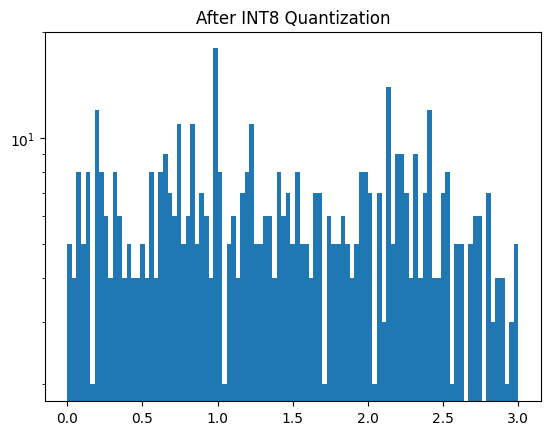

In [28]:
plt.hist(pred_pt/true_pt, bins=np.linspace(0,3,100));
plt.title("After INT8 Quantization")
plt.yscale("log")
plt.savefig('Output_after_INT8_quantization.png')

Above one is the output with the quantized dataset but not quantized model. We were wokring with the Dynamic Range Quantization. 
Dynamic range quantization is a recommended starting point because it provides reduced memory usage and faster computation without you having to provide a representative dataset for calibration. This type of quantization, statically quantizes only the weights from floating point to integer at conversion time, which provides 8-bits of precision.


## Quantized Model with the Quantized Dataset

Let's try with **[quantized model](https://www.tensorflow.org/lite/performance/post_training_quantization#full_integer_quantization_of_weights_and_activations)**, Post-training qunatization method, Dynamic range quantization. 

## Dynamic Range Quantization

Converting the model using dynamic range quantization(https://www.tensorflow.org/lite/performance/post_training_integer_quant):
Let's enable the default optimizations flag to quantize all fixed parameters (such as weights):
The model is now a bit smaller with quantized weights, but other variable data is still in float format.


In [29]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()


2023-11-07 16:12:09.994015: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-07 16:12:09.994315: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-07 16:12:09.995947: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpwcmc0uml
2023-11-07 16:12:10.044333: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-07 16:12:10.044366: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpwcmc0uml
2023-11-07 16:12:10.193891: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-07 16:12:10.812208: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpwcmc0uml
2023-11-07 16:12:11.173575: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }; Status: success: OK. Took 1177887

In [30]:
# Measuring the size of the quantized tflite model
# Saving the model
import os

with open('quantized_tflite_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)
    
model_size = os.path.getsize('quantized_tflite_model.tflite')

print(f"Size of the quantized model: {model_size} bytes")

Size of the quantized model: 5960536 bytes


In [31]:
# Load the quantized TFlite model
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [32]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [33]:
input_details

[{'name': 'serving_default_input_1:0',
  'index': 0,
  'shape': array([  1, 111,  17], dtype=int32),
  'shape_signature': array([ -1, 111,  17], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [34]:
# Assuming Xs_quantized is a list of quantized input data
input_data = Xs_quantized[ibatch]

# Print shapes for debugging
print("Input Data Shape:", input_data.shape)
print("Expected Input Shape:", input_details[0]['shape'][1:])


Input Data Shape: (10, 147, 17)
Expected Input Shape: [111  17]


Run the inference on the quantized TFLite model:

In [36]:
# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

ValueError: Cannot set tensor: Got value of type INT8 but expected type FLOAT32 for input 0, name: serving_default_input_1:0 

Let's try with the Full integer quantization 
## Full integer Quantization
Reductions in peak memory usage, and compatibility with integer only hardware devices or accelerators by making sure all model math is integer quantized.

For full integer quantization, you need to calibrate or estimate the range, i.e, (min, max) of all floating-point tensors in the model. Unlike constant tensors such as weights and biases, variable tensors such as model input, activations (outputs of intermediate layers) and model output cannot be calibrated unless we run a few inference cycles. As a result, the converter requires a representative dataset to calibrate them. This dataset can be a small subset (around ~100-500 samples) of the training or validation data. Refer to the `representative_dataset()`function below.


In [28]:
# Define a function to apply Full Integer quantization
def full_integer_quantization(model):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    return tflite_model

In [30]:
## Reading the dataset
ds_builder = tfds.builder("clic_edm_qq_pf", data_dir = '../../../tensorflow_datasets/')
dss = ds_builder.as_data_source("test")


# Define a function to preprocess the data
def preprocess_data(data):
    # Implement your preprocessing steps here
    return preprocessed_data


In [ ]:
# Process the dataset and run inference with quantized model
true_pts = []
pred_pts = []

for data_batch in tfds.as_numpy(dss):
    X = preprocess_data(data_batch["X"])
    ys = data_batch["ygen"]
    
    # Run inference with the quantized model
    try:
        interpreter = tf.lite.Interpreter(model_content=quantized_model)
        interpreter.allocate_tensors()
        
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
        
        interpreter.set_tensor(input_details[0]['index'], [X])
        interpreter.invoke()
        quantized_output = interpreter.get_tensor(output_details[0]['index'])
        
        mask_true_particles = ys[..., 0] != 0
        true_pt = ys[mask_true_particles, 2]
        pred_pt = quantized_output[0][mask_true_particles][..., 0]
        
        true_pts.extend(true_pt)
        pred_pts.extend(pred_pt)
    except Exception as e:
        print(f"Error processing batch: {e}")
